In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
print(tf.__version__)


2.2.0-rc4


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 34.94 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
test_data_dir ='/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 64
img_height = 64
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale = 1./255)

In [94]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width,img_height),
                                              classes = ['dogs','cats'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [95]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [96]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                              target_size = (img_width,img_height),
                                              classes = ['dogs','cats'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [97]:
len(train_generator)

1000

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation ='relu', padding='same',kernel_initializer='he_uniform', input_shape = (img_width,img_height,3)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units = 128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [0]:
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),epochs= 5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 166s 166ms/step - loss: 0.7139 - accuracy: 0.5016 - val_loss: 0.6922 - val_accuracy: 0.5326
Epoch 2/5
1000/1000 [==============================] - 163s 163ms/step - loss: 0.6891 - accuracy: 0.5179 - val_loss: 0.6594 - val_accuracy: 0.6232
Epoch 3/5
1000/1000 [==============================] - 160s 160ms/step - loss: 0.6201 - accuracy: 0.6643 - val_loss: 0.5659 - val_accuracy: 0.7218
Epoch 4/5
1000/1000 [==============================] - 159s 159ms/step - loss: 0.5549 - accuracy: 0.7210 - val_loss: 0.5706 - val_accuracy: 0.7090
Epoch 5/5
1000/1000 [==============================] - 158s 158ms/step - loss: 0.4974 - accuracy: 0.7616 - val_loss: 0.5387 - val_accuracy: 0.7300


In [102]:
history.history

{'accuracy': [0.5016000270843506,
  0.5178999900817871,
  0.6642500162124634,
  0.7210000157356262,
  0.7615500092506409],
 'loss': [0.7139091491699219,
  0.6891428828239441,
  0.6200695037841797,
  0.5549072623252869,
  0.49735161662101746],
 'val_accuracy': [0.5325999855995178,
  0.623199999332428,
  0.7218000292778015,
  0.7089999914169312,
  0.7300000190734863],
 'val_loss': [0.6922498941421509,
  0.6594051122665405,
  0.565876841545105,
  0.5705603957176208,
  0.5387072563171387]}

In [0]:
def plot_learningCurve(history,epoch):
  epoch_range= range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()


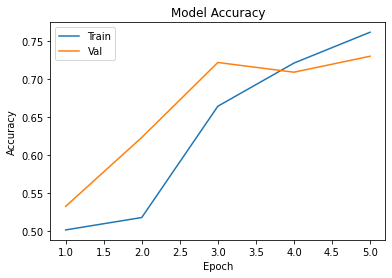

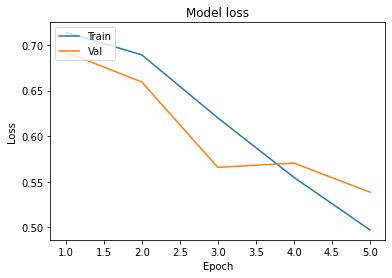

In [104]:
plot_learningCurve(history,5)

### Batch Normalization and Dropout and more blocks from VGG 16

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation ='relu', padding='same',kernel_initializer='he_uniform', input_shape = (img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size=(3,3),activation ='relu', padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters = 256, kernel_size=(3,3),activation ='relu', padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128,activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [0]:
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),epochs= 10,validation_data=validation_generator,validation_steps=len(validation_generator),verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 713s 713ms/step - loss: 0.6868 - accuracy: 0.6191 - val_loss: 0.6116 - val_accuracy: 0.6818
Epoch 2/10
1000/1000 [==============================] - 702s 702ms/step - loss: 0.5751 - accuracy: 0.7109 - val_loss: 0.5467 - val_accuracy: 0.7302
Epoch 3/10
1000/1000 [==============================] - 704s 704ms/step - loss: 0.5362 - accuracy: 0.7337 - val_loss: 0.6478 - val_accuracy: 0.6714
Epoch 4/10
1000/1000 [==============================] - 701s 701ms/step - loss: 0.4979 - accuracy: 0.7614 - val_loss: 0.5094 - val_accuracy: 0.7650
Epoch 5/10
1000/1000 [==============================] - 695s 695ms/step - loss: 0.4771 - accuracy: 0.7733 - val_loss: 0.5497 - val_accuracy: 0.7456
Epoch 6/10
1000/1000 [==============================] - 685s 685ms/step - loss: 0.4589 - accuracy: 0.7879 - val_loss: 0.5154 - val_accuracy: 0.7568
Epoch 7/10
1000/1000 [==============================] - 696s 696ms/step - loss: 0.4380 - accuracy: 0.7977 - val_

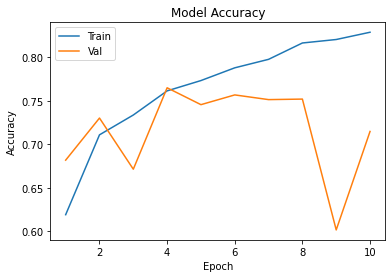

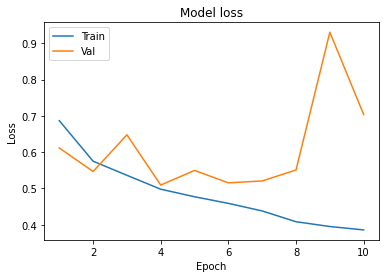

In [109]:
plot_learningCurve(history,10)